In [1]:
# Instalar dependências
!pip install mtcnn tensorflow opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import tensorflow as tf
from mtcnn import MTCNN
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from sklearn.preprocessing import Normalizer
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [3]:
# Carregar modelo FaceNet pré-treinado
facenet = InceptionResNetV2(weights='imagenet', include_top=False, pooling='avg')

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Função para detectar faces
def detect_faces(image):
    detector = MTCNN()
    faces = detector.detect_faces(image)
    face_images = []
    for face in faces:
        x, y, width, height = face['box']
        face_image = image[y:y+height, x:x+width]
        face_image = cv2.resize(face_image, (160, 160))
        face_images.append(face_image)
    return face_images

In [10]:
# Função para extrair embeddings faciais
def get_embedding(face_image):
    face_image = np.expand_dims(face_image, axis=0)
    face_image = preprocess_input(face_image)
    embedding = facenet.predict(face_image)
    return embedding.flatten()

In [6]:
# Criar um banco de dados de faces conhecidas
known_faces = {}
def add_known_face(name, image):
    faces = detect_faces(image)
    if len(faces) > 0:
        embedding = get_embedding(faces[0])
        known_faces[name] = embedding

In [8]:
# Função para reconhecer uma face comparando embeddings
def recognize_face(image):
    faces = detect_faces(image)
    for face in faces:
        embedding = get_embedding(face)
        min_dist = float("inf")
        identity = "Desconhecido"

        for name, known_embedding in known_faces.items():
            distance = cosine(known_embedding, embedding)
            if distance < min_dist and distance < 0.5:
                min_dist = distance
                identity = name

        print(f"Identificado: {identity} (distância: {min_dist:.4f})")
        plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
        plt.title(identity)
        plt.show()

In [12]:
#Confirme se as imagens jimCarrey.jpg e jimCarrey2.jpg foram carregadas corretamente
print(img1.shape if img1 is not None else "Erro ao carregar img1")
print(img2.shape if img2 is not None else "Erro ao carregar img2")

(330, 248, 3)
(249, 202, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Identificado: Jim Carrey (distância: 0.0924)


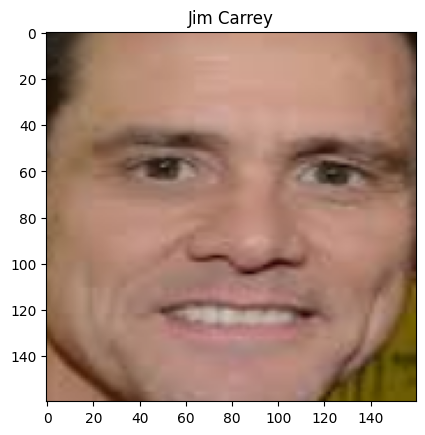

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Identificado: Desconhecido (distância: inf)


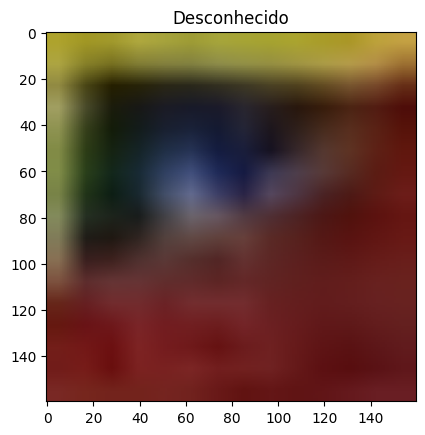

In [14]:
# 1. Adicionar rostos conhecidos
img1 = cv2.imread('jimCarrey.jpg')  # Substitua pelo caminho correto da imagem
add_known_face("Jim Carrey", img1)

# 2. Testar reconhecimento facial
img2 = cv2.imread('jimCarrey2.jpg')  # Outra foto da mesma pessoa
recognize_face(img2)